# Non-Linear Regression example


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:


!wget -nc -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Text(0, 0.5, 'GDP')

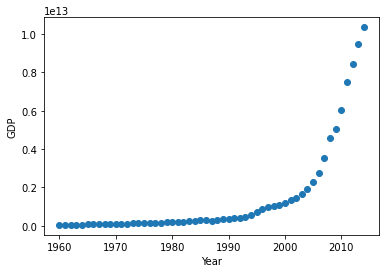

In [3]:
plt.scatter(df['Year'], df['Value'])
plt.xlabel('Year')
plt.ylabel('GDP')

#### this one may look Exponential at first look but it is not for 2 reasons:
1. as Jadi says "if you have wolf-like eyes you can see the second curve"
2. its GPD(Gross domestic product) it doesn't make sense to grow infinity and clearly its grow-speed cant be that high for ever

so it is Sigmoidal/Logistic/__S-curve__ ! ! !
- it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end

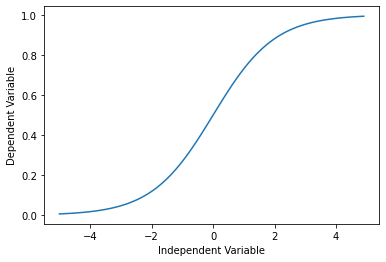

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


### the formula of the S-curve is $ \hat{Y} = \frac{1}{1+e^{( \beta_1(X - \beta_2) )}} $
- $ \beta_1 $ Controls the curve's steepness.
- $ \beta_2 $ slide the curve on the x-axis.

### lets build the model based on the formula:
Sigmoidal = Logistic = S-curve

In [5]:
def sigmoid(x, beta_1, beta_2):
    Y = 1 / (1 + np.exp(- (beta_1 * (x - beta_2))))
    return Y


now lets try a sample with this:

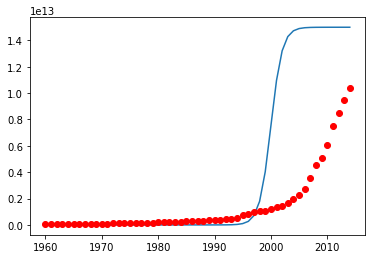

In [6]:
beta_1 = 1
beta_2 = 2000
x_data, y_data = (df["Year"].values, df["Value"].values)

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

too pointy! lets decrease the beta_1 :

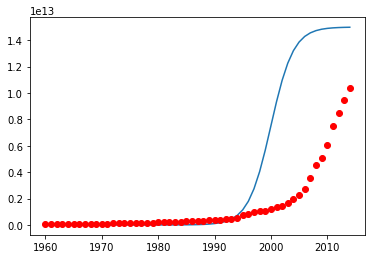

In [7]:
beta_1 = .5
beta_2 = 2000
x_data, y_data = (df["Year"].values, df["Value"].values)

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

#### better but not fit yet, but it doesn't make sense to try find $ \beta_1 $ and $ \beta_2 $ this way so we use __scipy.optimize.curve_fit__

this function will find best values that fit the curve but we should normalize our values before we can use them
- values =values/max(values)
- this way all our x and y's will be between 0 and 1


In [8]:
# normalizing
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


now we can draw it using the best possible beta's:

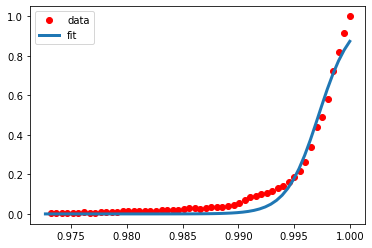

In [9]:
plt.plot(xdata, ydata, 'ro', label='data')      # actual data


beta_1 = popt[0]
beta_2 = popt[1]

x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, beta_1=beta_1, beta_2=beta_2)
plt.plot(x,y, linewidth=3.0, label='fit')       # our created model

plt.legend()
plt.show()

#### lets evaluate it :

In [11]:
mask = np.random.rand(len(df)) < .8
train = df[mask]
test = df[~mask]

normalized_train_x = train['Year'] / np.max(train['Year'])
normalized_train_y = train['Value'] / np.max(train['Value'])

normalized_test_x = test['Year'] / np.max(test['Year'])
normalized_test_y = test['Value'] / np.max(test['Value'])

train_betas, error = curve_fit(sigmoid, normalized_train_x, normalized_train_y)

y_hat = sigmoid(normalized_test_x, *train_betas)

from sklearn.metrics import r2_score
r2_score(y_hat, normalized_test_y)

0.918917494005329